# Importing modules & libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# About Dataset
```This dataset is originally from the National Institute of Diabetes and Digestive and Kidney```
```Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,```
```based on certain diagnostic measurements included in the dataset. Several constraints were placed```
```on the selection of these instances from a larger database. In particular, all patients here are females```
```at least 21 years old of Pima Indian heritage.2```
```From the data set in the (.csv) File We can find several variables, some of them are independent```
```(several medical predictor variables) and only one target dependent variable (Outcome).```

## Information about dataset attributes -

* ```Pregnancies```: To express the Number of pregnancies
* ```Glucose```: To express the Glucose level in blood
* ```BloodPressure```: To express the Blood pressure measurement
* ```SkinThickness```: To express the thickness of the skin
* ```Insulin```: To express the Insulin level in blood
* ```BMI```: To express the Body mass index
* ```DiabetesPedigreeFunction```: To express the Diabetes percentage
* ```Age```: To express the age
* ```Outcome```: To express the final result 1 is Yes and 0 is No

### Importing the training and testing data set

In [2]:
train = pd.read_csv("../DataSets/Training.csv")
test = pd.read_csv("../DataSets/Testing.csv")

In [3]:
train.shape

(2460, 9)

In [4]:
test.shape

(308, 9)

In [5]:
train.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
train.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2458,1,96,64,27,87,33.2,0.289,21,0
2459,6,105,70,32,68,30.8,0.122,37,0


In [7]:
train.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1804,0,177,60,29,478,34.6,1.072,21,1
1958,13,129,0,30,0,39.9,0.569,44,1


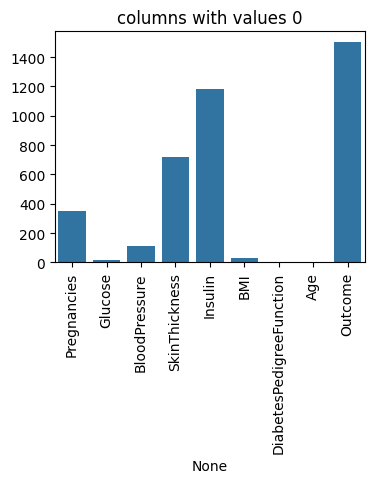

In [8]:
zero_counts = (train == 0).sum()
plt.figure(figsize=(4,3))
sns.barplot(x=zero_counts.index, y=zero_counts.values)
plt.xticks(rotation=90)
plt.title("columns with values 0")
plt.show()

### Ignoring ```Pregnancies``` and ```Outcome``` as they can be valued 0 here

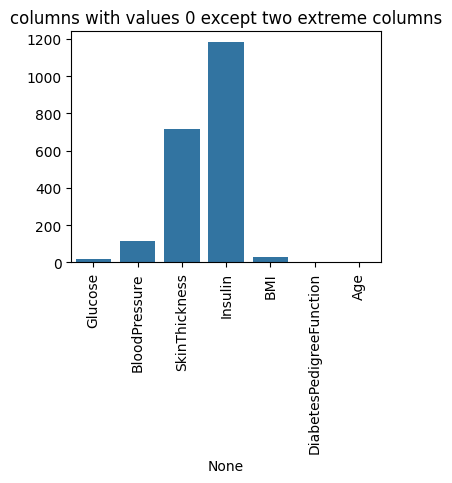

In [9]:
zero_counts_mod = (train.iloc[:,1:8] == 0).sum()
plt.figure(figsize=(4,3))
sns.barplot(x=zero_counts_mod.index, y=zero_counts_mod.values)
plt.xticks(rotation=90)
plt.title("columns with values 0 except two extreme columns")
plt.show()

In [10]:
print(f"Glucose => {(train['Glucose']==0).sum()}")
print(f"BloodPressure => {(train['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(train['SkinThickness']==0).sum()}")
print(f"Insulin => {(train['Insulin']==0).sum()}")
print(f"BMI => {(train['BMI']==0).sum()}")

Glucose => 17
BloodPressure => 114
SkinThickness => 717
Insulin => 1181
BMI => 31


In [11]:
print(f"Glucose => {(test['Glucose']==0).sum()}")
print(f"BloodPressure => {(test['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(test['SkinThickness']==0).sum()}")
print(f"Insulin => {(test['Insulin']==0).sum()}")
print(f"BMI => {(test['BMI']==0).sum()}")

Glucose => 1
BloodPressure => 14
SkinThickness => 93
Insulin => 152
BMI => 4


In [12]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    train = train[train[column] != 0]

In [13]:
print(f"Glucose => {(train['Glucose']==0).sum()}")
print(f"BloodPressure => {(train['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(train['SkinThickness']==0).sum()}")
print(f"Insulin => {(train['Insulin']==0).sum()}")
print(f"BMI => {(train['BMI']==0).sum()}")

Glucose => 0
BloodPressure => 0
SkinThickness => 0
Insulin => 0
BMI => 0


In [14]:
t = train.sample(n=1000,replace=True,random_state=1)
train = pd.concat([train,t],ignore_index=True)
train.reset_index(drop=True,inplace=True)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
2263,0,165,76,43,255,47.9,0.259,26,0
2264,4,197,70,39,744,36.7,2.329,31,0
2265,10,148,84,48,237,37.6,1.001,51,1
2266,1,112,72,30,176,34.4,0.528,25,0


In [15]:
train.shape

(2268, 9)

### Dataset clearing done now 

## EDA

In [16]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2268 non-null   int64  
 1   Glucose                   2268 non-null   int64  
 2   BloodPressure             2268 non-null   int64  
 3   SkinThickness             2268 non-null   int64  
 4   Insulin                   2268 non-null   int64  
 5   BMI                       2268 non-null   float64
 6   DiabetesPedigreeFunction  2268 non-null   float64
 7   Age                       2268 non-null   int64  
 8   Outcome                   2268 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 159.6 KB


In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2268.0,3.348765,3.243610,0.000,1.000,2.000,5.000,17.00
Glucose,2268.0,123.472222,30.696698,71.000,100.000,119.000,144.000,197.00
BloodPressure,2268.0,70.402557,11.811665,30.000,64.000,70.000,78.000,110.00
SkinThickness,2268.0,29.181217,10.703085,7.000,21.000,29.000,37.000,63.00
Insulin,2268.0,155.784832,122.907016,14.000,74.000,120.000,192.000,846.00
BMI,2268.0,32.900000,7.053362,19.300,27.800,33.100,36.700,67.10
DiabetesPedigreeFunction,2268.0,0.525190,0.383455,0.088,0.264,0.434,0.673,2.42
Age,2268.0,30.585538,10.099732,21.000,24.000,27.000,34.000,81.00
Outcome,2268.0,0.368607,0.482533,0.000,0.000,0.000,1.000,1.00


In [19]:
train.Pregnancies.value_counts()

Pregnancies
1     565
2     368
0     288
4     214
3     207
5     178
6      91
8      83
9      76
7      73
10     43
12     23
11     16
13     14
17     14
15     10
14      5
Name: count, dtype: int64

## Pairplot with respect to Outcome to check and then Boxplot

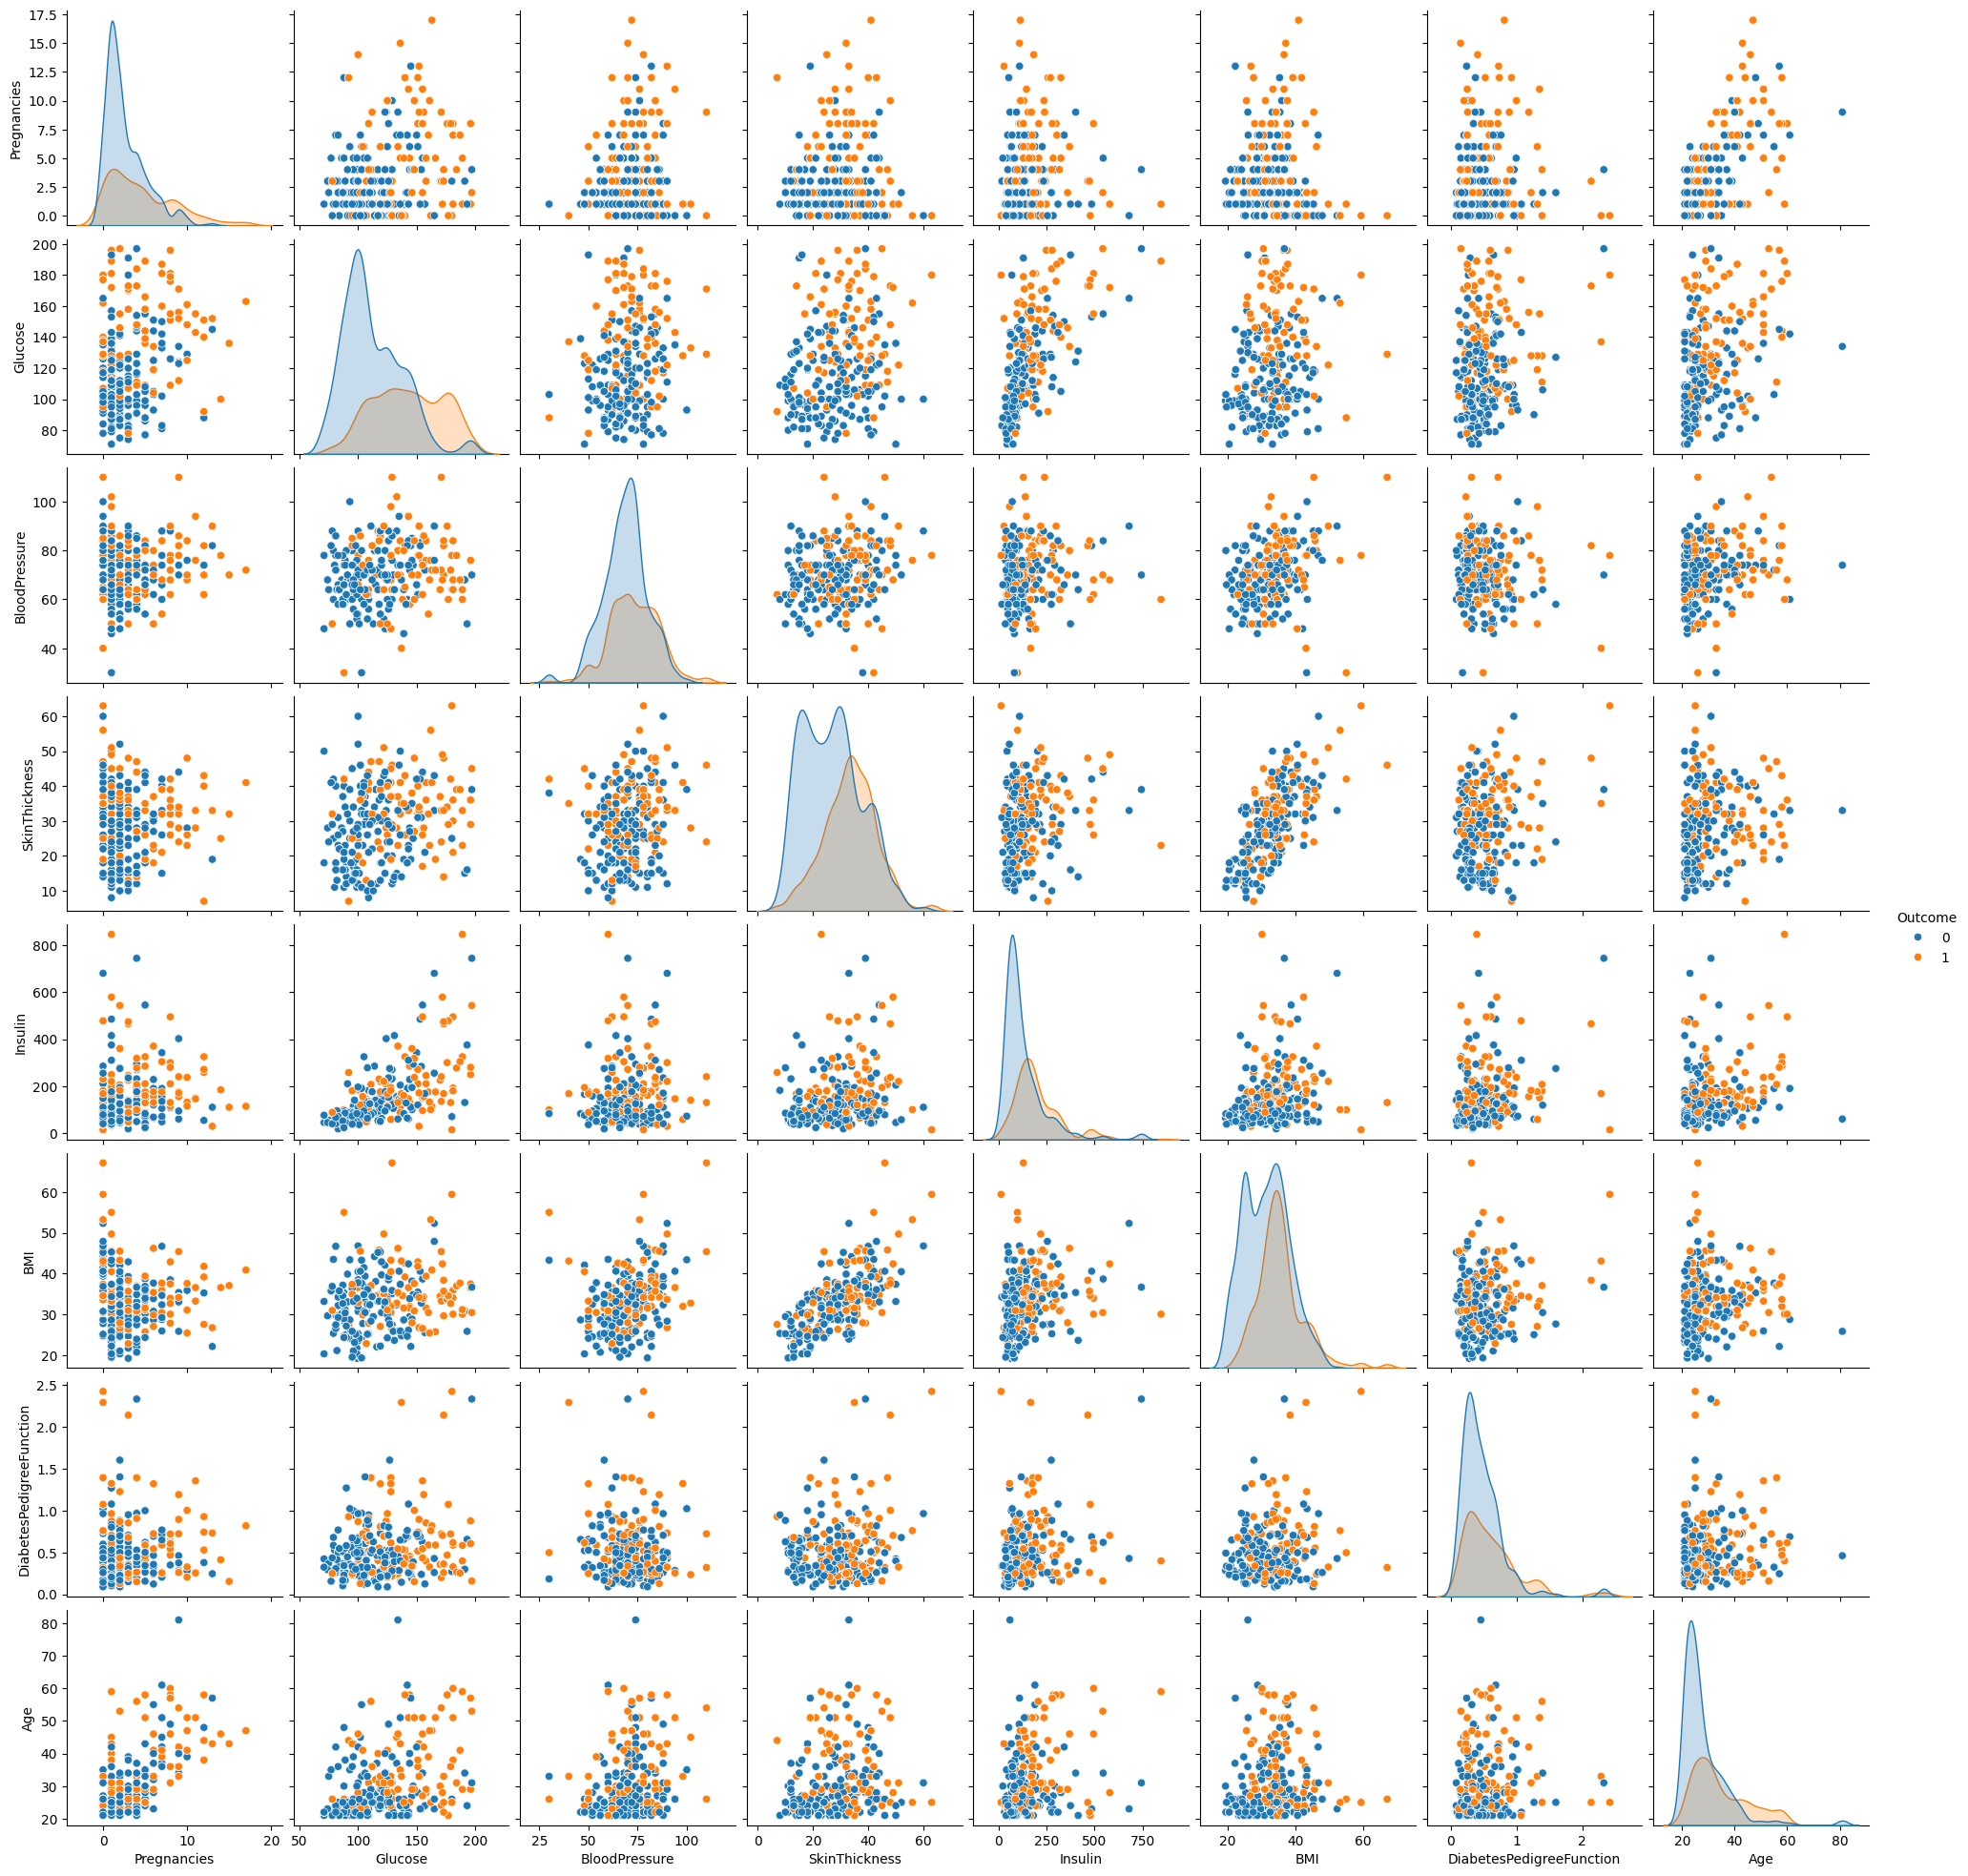

In [20]:
import seaborn as sns

# Assuming 'train' is your DataFrame
sns.pairplot(train, hue='Outcome')

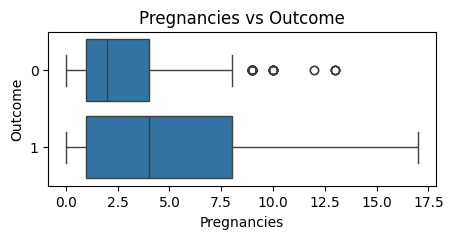

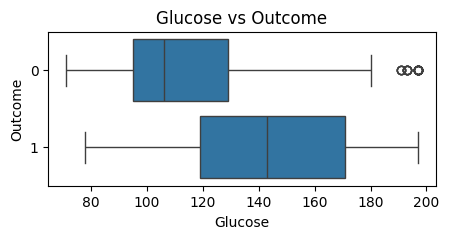

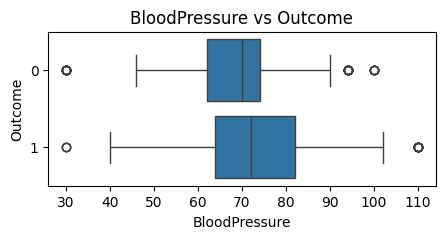

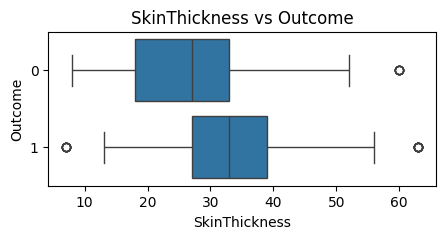

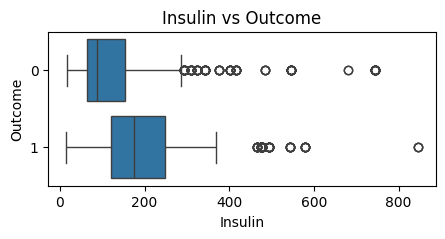

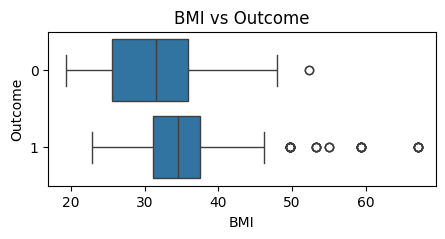

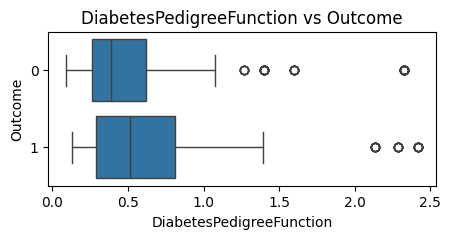

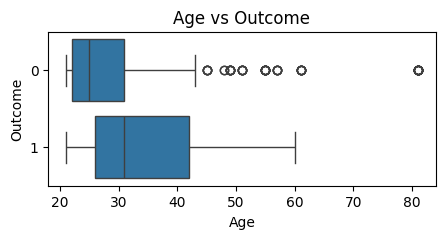

In [21]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=column, y='Outcome', data=train, orient='h')
    plt.title(f'{column} vs Outcome')
    plt.show()